# Import libs

In [1]:
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sys

sys.path.append('..')
from eFlow.ClusterMaster import *
from eFlow.DataFrameTypes import *
from eFlow.DataAnalysis import *
from eFlow.DataCleaner import *
from xgboost import XGBClassifier
import ipython_blocking
from pivottablejs import pivot_ui

In [2]:
%matplotlib notebook
%matplotlib inline

### Be sure to run the following

## Declare Worflow Variables

#### (This should be the only place you should have to declare anything)

In [3]:
dataset_path = "Datasets/titanic_train.csv"
target_col = "Survived"
parent_project_name = "Pre processing"

# Import dataset

In [4]:
df = pd.read_csv(dataset_path)
display(df.shape)
df.head()

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Interaction tool for dataframes

### Explore the data

In [5]:
pivot_ui(df,
         outfile_path='Piviot_Table_JS.html')

## Remove Un-Wanted Columns

### Do not remove nans yet, let the datacleaner do it's job

In [6]:
df.drop(columns=["Name",
                 "Ticket",
                 "PassengerId"],
        inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Basic Feature manipulation

### Change cabin column to have the level on the ship

In [7]:
df["Cabin"] = df["Cabin"].str.replace(r'\d+', '').str[0]

In [8]:
# df.drop(columns=["Age"],
#         inplace=True)

## Change Feature Data types

### Look at data types

In [9]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

### Make given data type changes

In [10]:
df["Survived"] = df["Survived"].astype(bool)

### Final look at data types

In [11]:
df.dtypes

Survived       bool
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

## Set up DataFrameTypes

In [12]:
df_features = DataFrameTypes(df,
                             target_col=target_col)

Categorical Features: {'Embarked', 'Sex', 'Cabin'}

Bool Features: {'Survived'}

Possible One hot encoded feature names: {'Embarked': ['Embarked_Q', 'Embarked_C', 'Embarked_S'], 'Sex': ['Sex_female', 'Sex_male'], 'Cabin': ['Cabin_B', 'Cabin_A', 'Cabin_E', 'Cabin_T', 'Cabin_G', 'Cabin_F', 'Cabin_C', 'Cabin_D']}

------------------------------------------------------------------------------------------
Numerical Features: {'Fare', 'Age', 'SibSp', 'Parch', 'Pclass'}

Integer Features: {'Pclass', 'SibSp', 'Parch'}

Float Features: {'Fare', 'Age'}

Target Feature: Survived



## Skim through Value Counts

In [13]:
for col in df.columns:
    if col not in df_features.get_float_features() or len(np.unique(df[col].dropna().values)) <= 12:
        display(df[col].value_counts())
        print("***" * 4 + "\n\n")

False    549
True     342
Name: Survived, dtype: int64

************




3    491
1    216
2    184
Name: Pclass, dtype: int64

************




male      577
female    314
Name: Sex, dtype: int64

************




0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

************




0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

************




C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

************




S    644
C    168
Q     77
Name: Embarked, dtype: int64

************




### Perform quick analysis

In [14]:
# analysis_obj = DataAnalysis(df,
#                             df_features,
#                             project_name=parent_project_name + "/" + "General Analysis")

## Data Cleaning

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


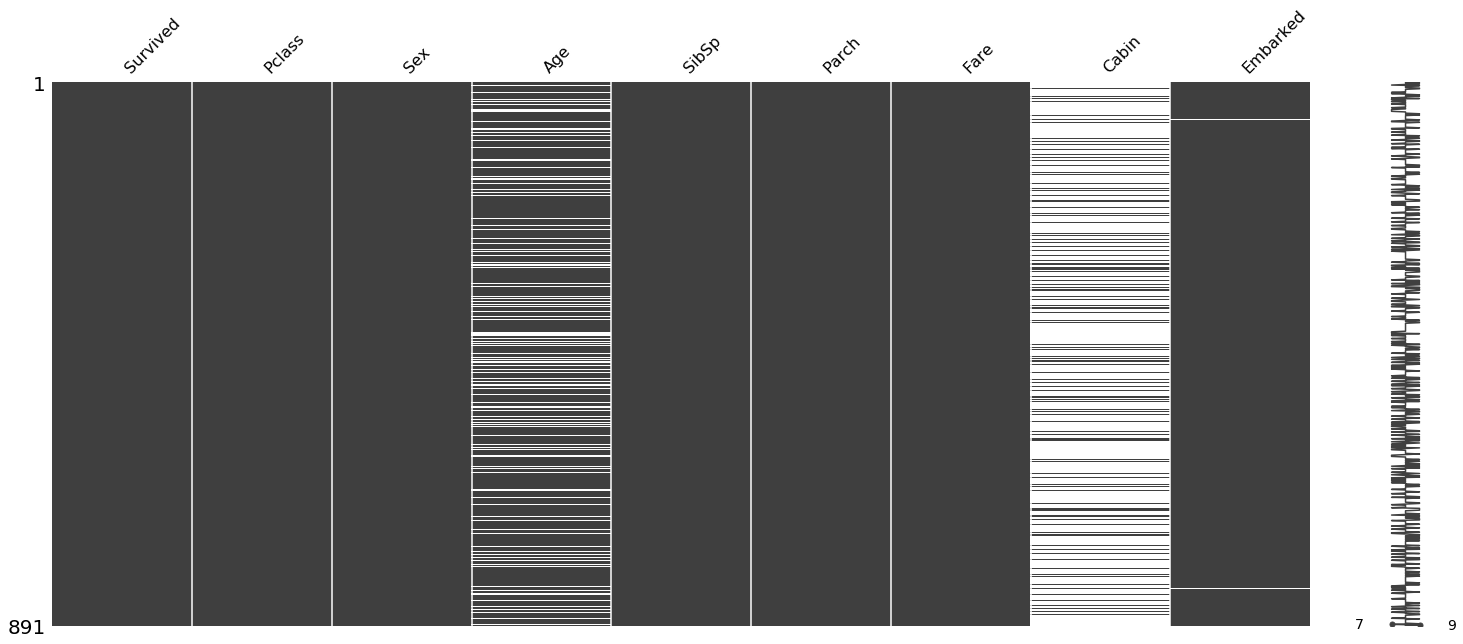

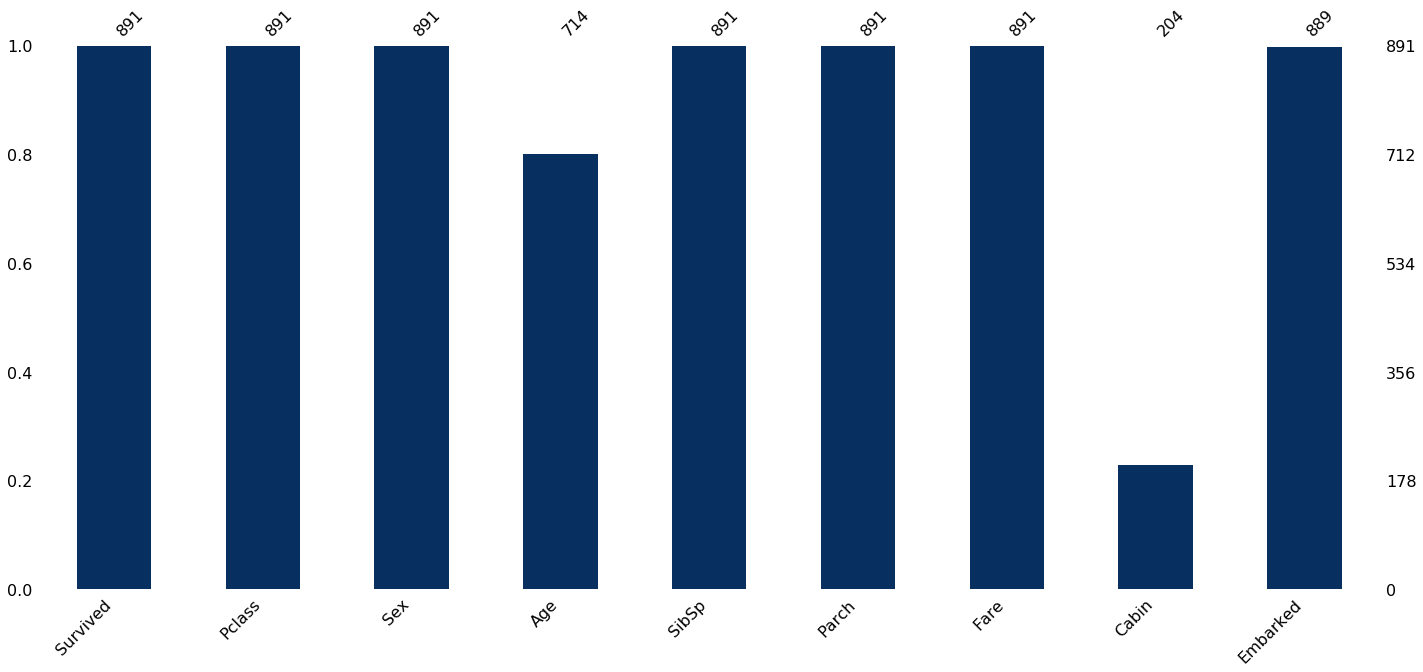

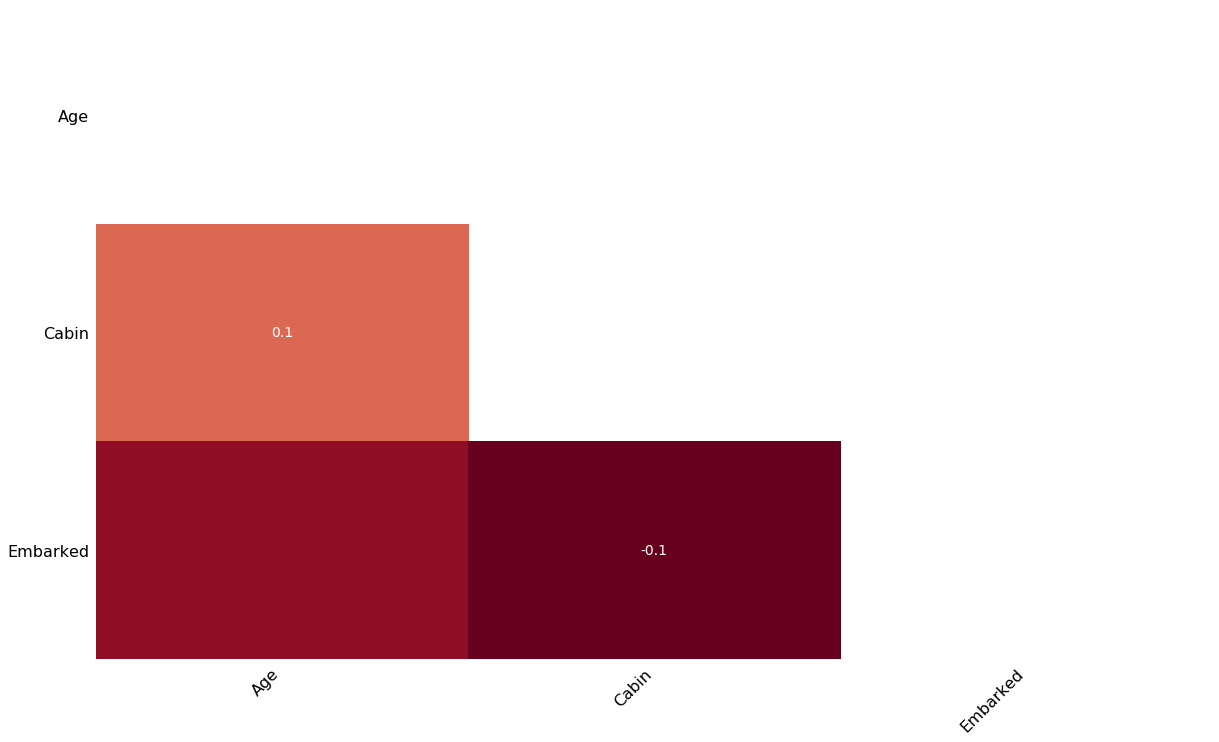

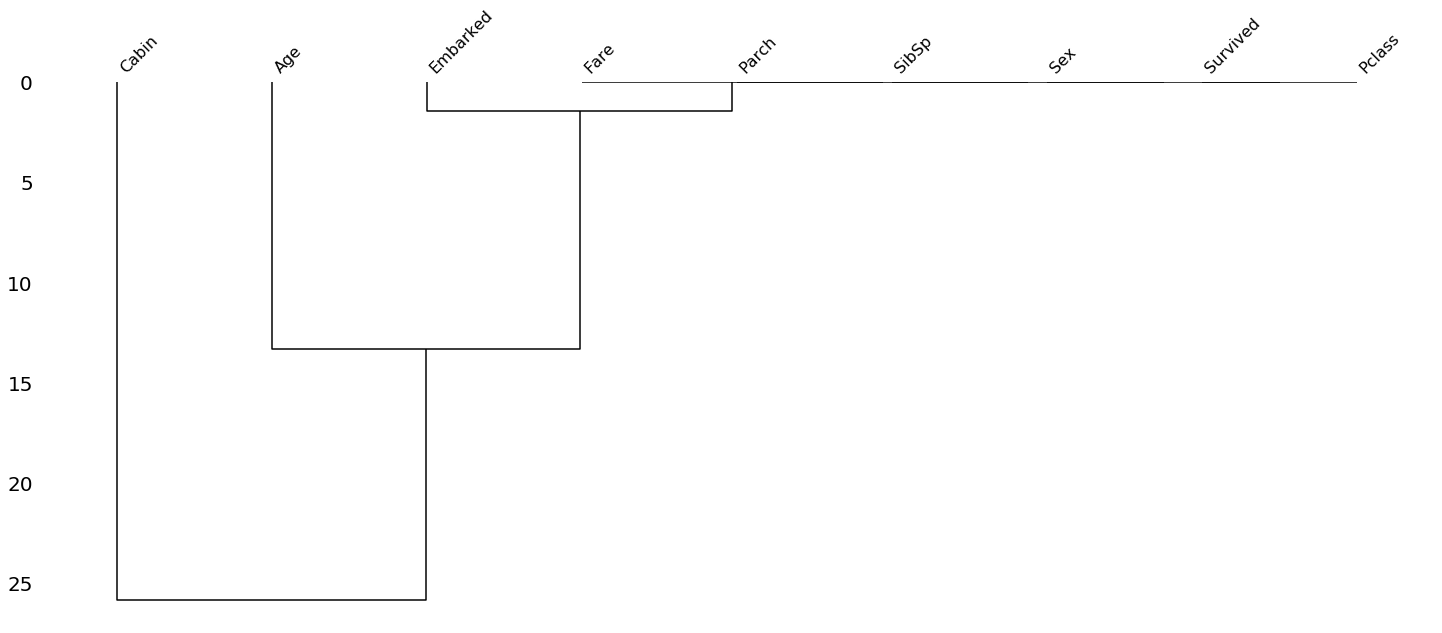

In [15]:
data_cleaner = DataCleaner(df,
                           project_name=parent_project_name + "/" + "Data Cleaning",
                           missing_data_visuals=True)

In [16]:
submit_button = data_cleaner.data_cleaning_widget(df,
                                                  df_features)

Text(value='Default Data Cleaning', description='File Name:', layout=Layout(left='590px'), placeholder='Replac…

interactive(children=(Select(description='Features', layout=Layout(height='175px', width='50%'), options=('Age…

Button(description='Create JSON File from options', layout=Layout(bottom='5px', left='100px', width='40%'), st…

In [17]:
from scipy import stats
df.reset_index(drop=True)
z_score_return = stats.zscore(((df["Age"].dropna())))
df["Age"].dropna()[(z_score_return >= -2) & (z_score_return <= 2)]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
34     28.0
35     42.0
37     21.0
38     18.0
39     14.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 685, dtype: float64

In [ ]:
if True:
    %block submit_button

In [ ]:
data_cleaner.data_cleaning_with_json_file(df,
                                          data_cleaner.get_last_saved_json_file_path())